In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Description

In [66]:
wga_csv = pd.read_csv("Mini_Result_WGA.csv")

In [69]:
wga_csv.columns

Index(['Client', 'GroupCode', 'NominatedBankAccountNumber', 'TransactionType',
       'TransactionDescription', 'DocumentType', 'DocumentDescription',
       'TransactionDocumentNumber', 'Payee', 'RequisitionNumber',
       'ChequeNumber', 'UserReference1', 'UserReference2', 'Code2Reference',
       'TransactionAmount', 'TransactionActionDate', 'TransactionMovementDate',
       'TransactionStatus', 'HomingAccountNumber', 'HomingBankName',
       'HomingBankBranch', 'HomingBankBranchName', 'HomingBankAccountType',
       'TransactionCreatedDate', 'TransactionCreatedTime', 'UnpaidErrorCode',
       'UnpaidErrorDescription', 'UnpaidEffectiveDate', 'UnpaidMovementDate',
       'UnpaidAgeInDays', 'IncomingBatchNumber', 'UniqueUserCode',
       'EFTBatchNumber', 'TransactionDateRequested',
       'TransactionTimeRequested', 'TransmissionService', 'DebiCheckStatus',
       'DebiCheckTrackingPeriod', 'DebiCheckCollectionDate',
       'DebiCheckSettlementDate', 'DebiCheckEndofTrackingDate'],
  

In [70]:
wga_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14724 entries, 0 to 14723
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      14724 non-null  object 
 1   GroupCode                   14724 non-null  object 
 2   NominatedBankAccountNumber  14724 non-null  int64  
 3   TransactionType             14724 non-null  object 
 4   TransactionDescription      14724 non-null  object 
 5   DocumentType                14724 non-null  int64  
 6   DocumentDescription         14724 non-null  object 
 7   TransactionDocumentNumber   14724 non-null  int64  
 8   Payee                       14724 non-null  object 
 9   RequisitionNumber           14724 non-null  int64  
 10  ChequeNumber                14724 non-null  object 
 11  UserReference1              14724 non-null  object 
 12  UserReference2              14724 non-null  object 
 13  Code2Reference              147

In [81]:
str_columns = wga_csv.select_dtypes(include=['object']).columns
wga_csv[list(str_columns.values)]['DocumentDescription'].iloc[0]

'NAEDO 07 DAY                  '

In [82]:
wga_csv[str_columns] = wga_csv[str_columns].apply(lambda x: x.str.strip())

In [83]:
str_columns = wga_csv.select_dtypes(include=['object']).columns
wga_csv[list(str_columns.values)]['DocumentDescription'].iloc[0]

'NAEDO 07 DAY'

Get a gist of the data to understand what the columns do

### Exploratory Data Analysis

In [84]:
wga_csv.head()

,Client,GroupCode,NominatedBankAccountNumber,TransactionType,TransactionDescription,DocumentType,DocumentDescription,TransactionDocumentNumber,Payee,RequisitionNumber,...,UniqueUserCode,EFTBatchNumber,TransactionDateRequested,TransactionTimeRequested,TransmissionService,DebiCheckStatus,DebiCheckTrackingPeriod,DebiCheckCollectionDate,DebiCheckSettlementDate,DebiCheckEndofTrackingDate
0,FACWGAPDB,EFT COLLECTIONS - UNPAID,4077846457,FDC10,DEBICHECK FNB,7,NAEDO 07 DAY,100,I Mankge ...,1539114,...,7556,785,2023-11-23,02:55:00,ABSADEBI - DEBICHEC,Disputed,10,2023-11-24,NaN,2023-12-04
1,FACWGAPDB,EFT COLLECTIONS - UNPAID,4077846457,FDC10,DEBICHECK FNB,7,NAEDO 07 DAY,100,I Mankge ...,1602958,...,7556,801,2023-12-13,03:00:05,ABSADEBI - DEBICHEC,Disputed,10,2023-12-14,NaN,2023-12-24
2,FACWGAPDB,EFT COLLECTIONS - UNPAID,4077846457,FDC10,DEBICHECK FNB,7,NAEDO 07 DAY,100,S Keen ...,1605850,...,7556,801,2023-12-13,03:00:43,ABSADEBI - DEBICHEC,Disputed,10,2023-12-14,NaN,2023-12-24
3,FACWGAPDB,EFT COLLECTIONS - UNPAID,4077846457,FDC10,DEBICHECK FNB,7,NAEDO 07 DAY,100,S Schmidt ...,1640839,...,7556,807,2023-12-21,02:35:09,ABSADEBI - DEBICHEC,Disputed,10,2023-12-22,NaN,2024-01-01
4,FACWGAPDB,EFT COLLECTIONS - UNPAID,4077846457,FDC10,DEBICHECK FNB,7,NAEDO 07 DAY,100,AL RASODI ...,1640835,...,7556,807,2023-12-21,02:35:09,ABSADEBI - DEBICHEC,Disputed,10,2023-12-22,NaN,2024-01-01


In [85]:
wga_csv['Payee'].value_counts()

Payee
L Nhlapo                                          0010202312090A3B9AD9F4    RCUR    7
Y Dookoo                                          001020231128633F919ECC    RCUR    7
T Ronne                                           0010202312247869C91F4F    RCUR    7
T Khumalo                                         0010202311293354E49093    RCUR    7
b bele                                            001020240103B63516CE14    RCUR    7
                                                                                   ..
C ESTERHUYSE                                      001020231214DABAA5815D    RCUR    6
U Funde                                           001020231221EBEA61F4FC    RCUR    6
MM Edom                                           0010202312312EFE732E31    RCUR    6
T Abrahams                                        001020240103736D91157E    RCUR    6
Z Zondi                                           001020240205D0C68D00FD    RCUR    6
Name: count, Length: 2453, dtype: int64

In [86]:
# columns = ['TransactionType','TransactionDescription','Payee','TransactionAmount','TransactionActionDate','TransactionMovementDate',
# 'TransactionStatus','TransactionCreatedDate','TransactionCreatedTime',
# 'UnpaidErrorCode','UnpaidErrorDescription','UnpaidEffectiveDate', 'UnpaidMovementDate','UnpaidAgeInDays'
# ]

In [87]:
def split_payee_column(payee_string):
    # Split by whitespace and filter out empty strings
    parts = [part for part in payee_string.split(" ") if part]
    payee_name = " ".join(parts[:-2])
    payee_number = parts[-2]
    payee_type = parts[-1]
    return pd.Series([payee_name, payee_number, payee_type])

In [88]:
wga_csv[['PayeeName', 'PayeeNumber', 'PayeeType']] = wga_csv['Payee'].apply(split_payee_column)

In [89]:
wga_csv[['Payee', 'PayeeName', 'PayeeNumber', 'PayeeType']]

,Payee,PayeeName,PayeeNumber,PayeeType
0,I Mankge ...,I Mankge,0003202310310223247011,RCUR
1,I Mankge ...,I Mankge,0003202310310223247011,RCUR
2,S Keen ...,S Keen,001020231125C5BF136D6C,RCUR
3,S Schmidt ...,S Schmidt,0001202311280000015366,RCUR
4,AL RASODI ...,AL RASODI,0002202312010000003451,RCUR
...,...,...,...,...
14719,M Mngomezulu ...,M Mngomezulu,001020240209D2FCD281B8,RCUR
14720,AMT Machado ...,AMT Machado,001020240206E3348951D8,RCUR
14721,w mlungwana ...,w mlungwana,0003202402090791012550,RCUR
14722,G Cronje ...,G Cronje,001020240203CFAD798C83,RCUR


In [90]:
columns = ['TransactionAmount','TransactionActionDate','TransactionMovementDate',
'TransactionStatus','TransactionCreatedDate','TransactionCreatedTime',
'UnpaidErrorCode','UnpaidErrorDescription','UnpaidEffectiveDate', 'UnpaidMovementDate','UnpaidAgeInDays','PayeeName'
]

In [91]:
wga_csv[columns]

,TransactionAmount,TransactionActionDate,TransactionMovementDate,TransactionStatus,TransactionCreatedDate,TransactionCreatedTime,UnpaidErrorCode,UnpaidErrorDescription,UnpaidEffectiveDate,UnpaidMovementDate,UnpaidAgeInDays,PayeeName
0,1742.60,2023-11-24,2023-11-24,Unpaid,2023-11-23,00:46:47,F2,TRANSACTION DISPUTED,2024-01-03,2024-01-03,40.0,I Mankge
1,1742.60,2023-12-14,2023-12-20,Unpaid,2023-12-13,00:46:48,F2,TRANSACTION DISPUTED,2024-01-03,2024-01-03,20.0,I Mankge
2,1751.74,2023-12-14,2023-12-14,Unpaid,2023-12-13,07:08:56,F2,TRANSACTION DISPUTED,2024-05-20,2024-05-20,158.0,S Keen
3,859.93,2023-12-22,2023-12-23,Unpaid,2023-12-21,19:08:14,F2,TRANSACTION DISPUTED,2024-01-21,2024-01-21,30.0,S Schmidt
4,1746.58,2023-12-22,2023-12-30,Unpaid,2023-12-21,00:46:16,F2,TRANSACTION DISPUTED,2024-01-03,2024-01-03,12.0,AL RASODI
...,...,...,...,...,...,...,...,...,...,...,...,...
14719,1413.20,2024-08-05,NaN,Processed,2024-08-03,02:02:25,,,NaN,NaN,NaN,M Mngomezulu
14720,527.12,2024-08-05,2024-08-05,Cashed,2024-08-03,02:02:21,,,NaN,NaN,NaN,AMT Machado
14721,519.67,2024-08-07,NaN,Processed,2024-08-06,02:04:36,,,NaN,NaN,NaN,w mlungwana
14722,534.09,2024-08-07,NaN,Processed,2024-08-06,02:04:40,,,NaN,NaN,NaN,G Cronje


In [92]:
wga_csv[columns].to_csv("test.csv", index=False)

In [93]:
data = wga_csv[columns]

In [94]:
# data = data[data['PayeeName'].isin(['I Mankge', 'S Keen', 'Z Zondi'])]

In [110]:
data['PayeeName'].value_counts()

PayeeName
M Erasmus       18
N Ngubane       18
N Mbatha        18
M Zulu          18
K Mongale       12
                ..
MS Zwane         6
C ESTERHUYSE     6
U Funde          6
MM Edom          6
Z Zondi          6
Name: count, Length: 2405, dtype: int64

Take Mbatha

In [113]:
data = data[data['PayeeName'] == 'N Mbatha']

In [114]:
data['TransactionActionDate'] = pd.to_datetime(data['TransactionActionDate'])
data['TransactionMovementDate'] = pd.to_datetime(data['TransactionMovementDate'])
data['TransactionCreatedDate'] = pd.to_datetime(data['TransactionCreatedDate'])
data['UnpaidEffectiveDate'] = pd.to_datetime(data['UnpaidEffectiveDate'])
data['UnpaidMovementDate'] = pd.to_datetime(data['UnpaidMovementDate'])

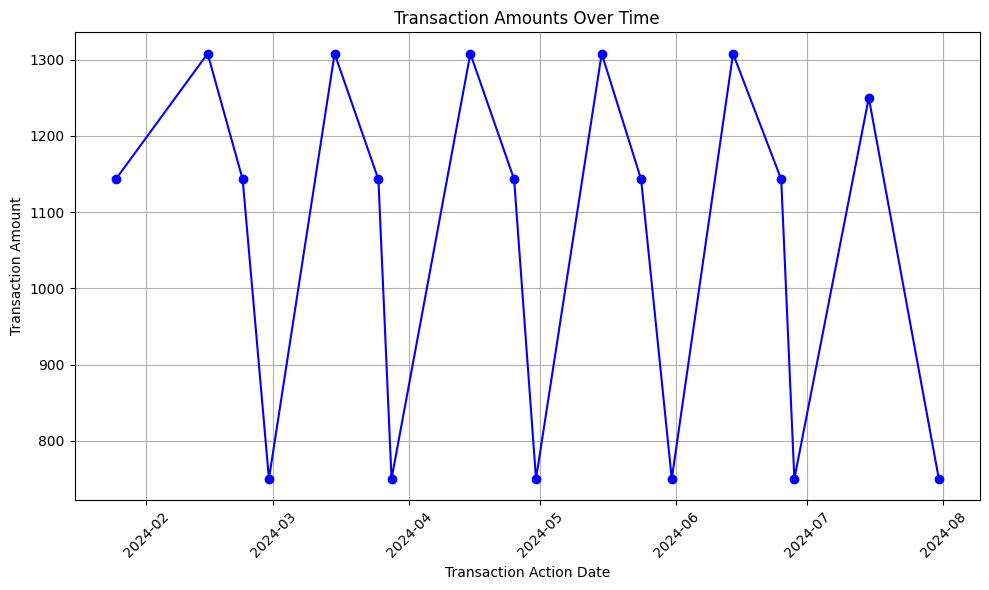

In [115]:
# Plotting transaction amounts over time
plt.figure(figsize=(10, 6))
plt.plot(data['TransactionActionDate'], data['TransactionAmount'], marker='o', linestyle='-', color='b')
plt.title('Transaction Amounts Over Time')
plt.xlabel('Transaction Action Date')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Line Chart: Shows the transaction amount over time, indicating how the amounts vary across different dates.

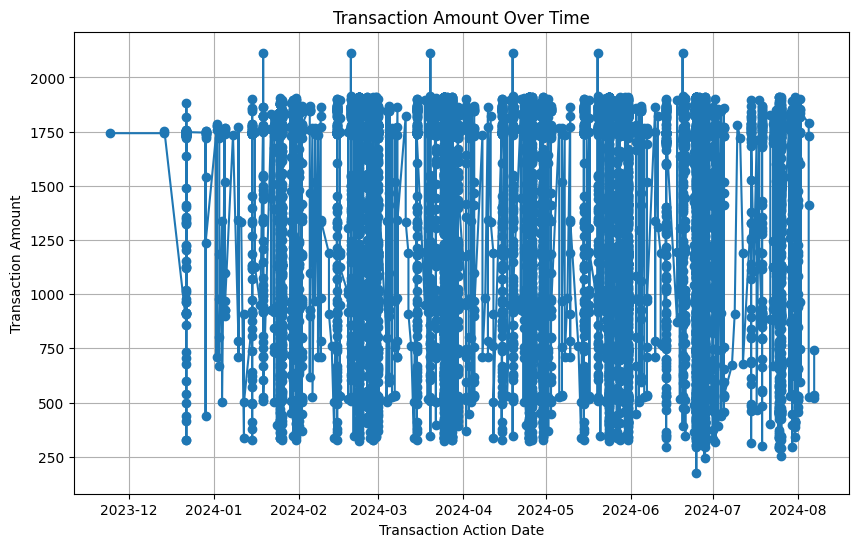

In [98]:
# Visualization 1: Line Chart for Transaction Amount over Time
plt.figure(figsize=(10, 6))
plt.plot(data['TransactionActionDate'], data['TransactionAmount'], marker='o')
plt.title('Transaction Amount Over Time')
plt.xlabel('Transaction Action Date')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()

Bar Chart: Illustrates the distribution of transaction statuses, highlighting how many transactions fall under each status.

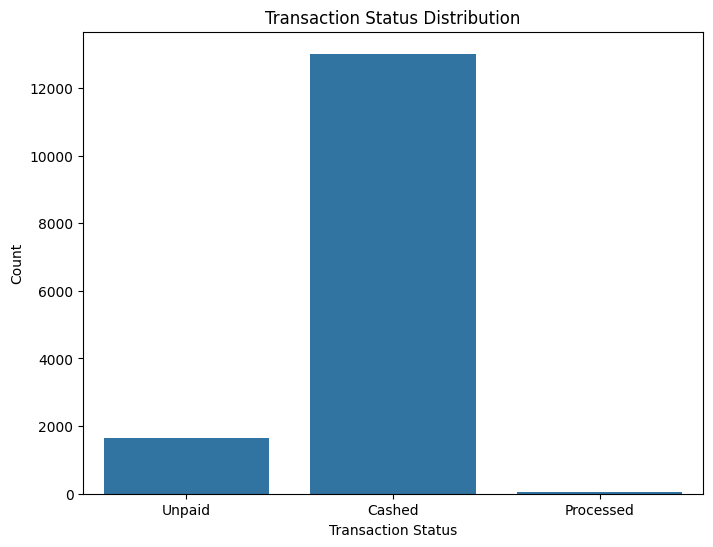

In [99]:
# Visualization 2: Bar Chart for Transaction Status Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='TransactionStatus')
plt.title('Transaction Status Distribution')
plt.xlabel('Transaction Status')
plt.ylabel('Count')
plt.show()

Bar Chart: Displays the frequency of different unpaid error codes, helping identify the most common issues.

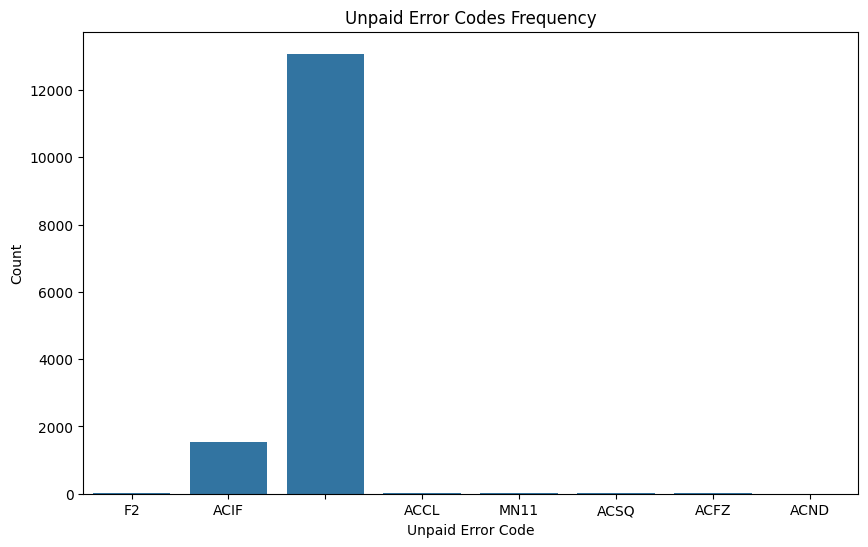

In [100]:
# Visualization 3: Bar Chart for Unpaid Error Codes
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='UnpaidErrorCode')
plt.title('Unpaid Error Codes Frequency')
plt.xlabel('Unpaid Error Code')
plt.ylabel('Count')
plt.show()

Histogram: Depicts the distribution of unpaid age in days, revealing how long transactions typically remain unpaid.

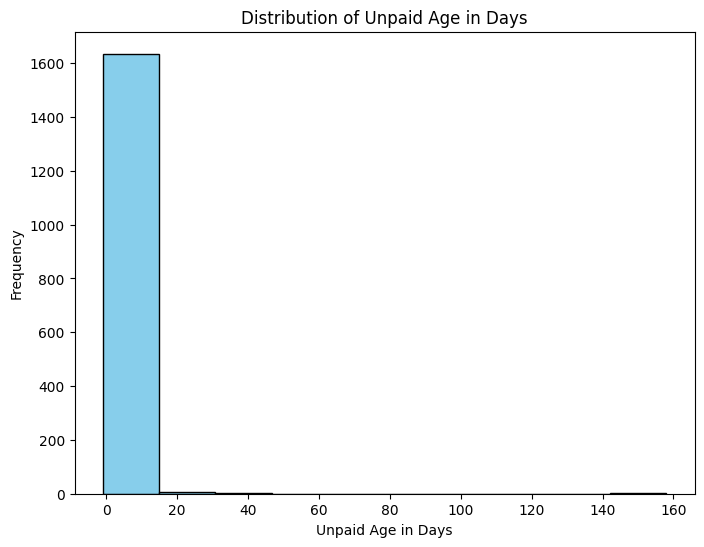

In [101]:
# Visualization 4: Histogram for Unpaid Age in Days
plt.figure(figsize=(8, 6))
plt.hist(data['UnpaidAgeInDays'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Unpaid Age in Days')
plt.xlabel('Unpaid Age in Days')
plt.ylabel('Frequency')
plt.show()

Heatmap: Shows the correlation between TransactionAmount and UnpaidAgeInDays, providing insight into any relationships between these variables.

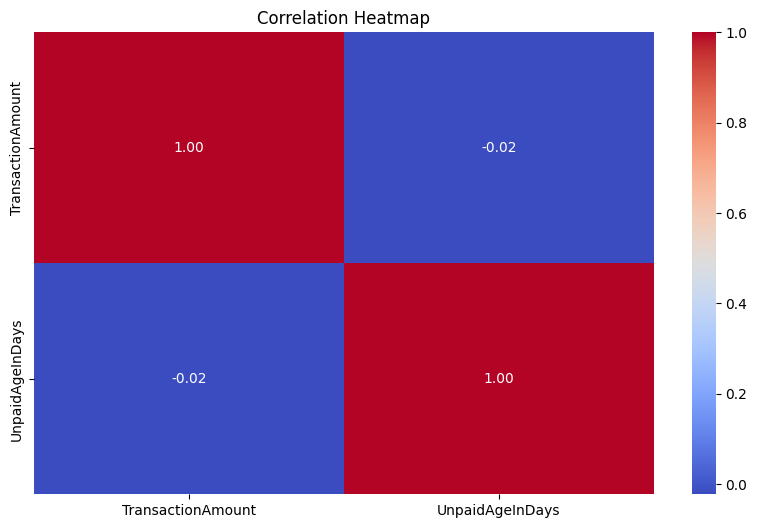

In [102]:
# Visualization 5: Heatmap for Correlation
plt.figure(figsize=(10, 6))
correlation_matrix = data[['TransactionAmount', 'UnpaidAgeInDays']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [103]:
data['TransactionStatus'].iloc[0]

'Unpaid'

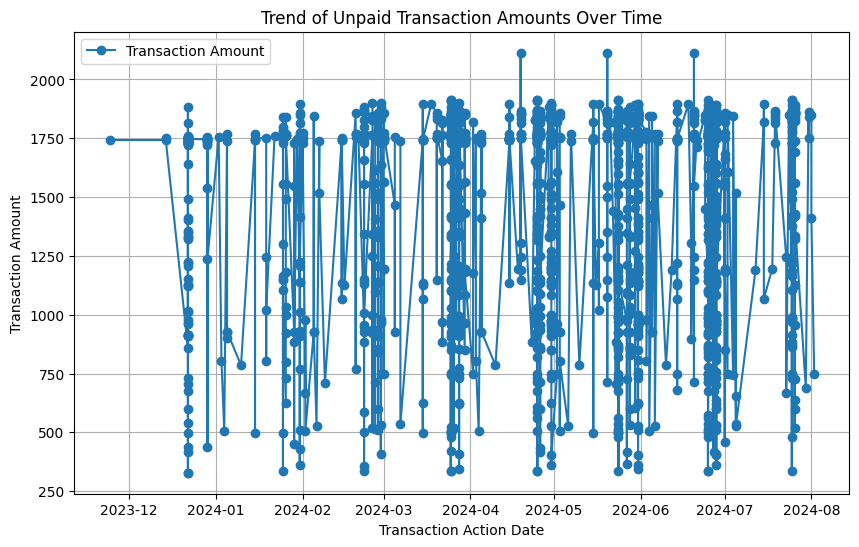

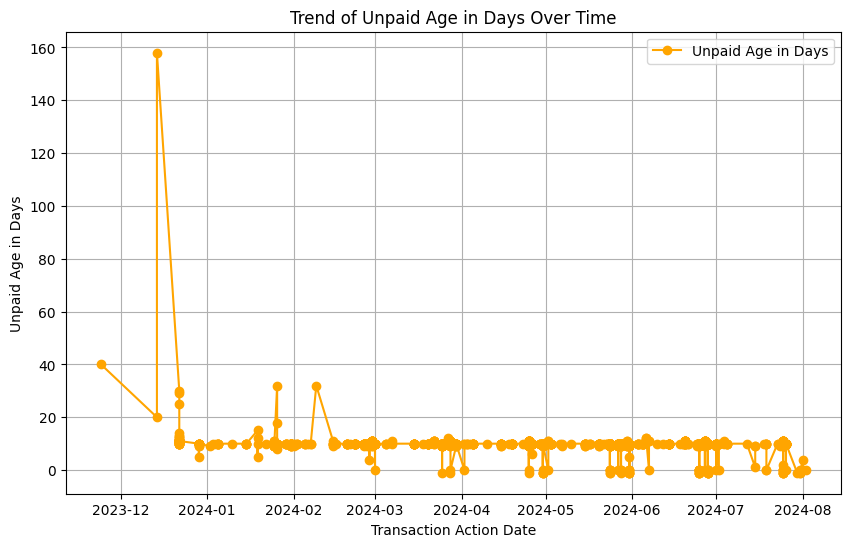

In [104]:
# Filter data for unpaid transactions
unpaid_data = data[data['TransactionStatus'] == 'Unpaid']

# Plot trend of unpaid transaction amounts over time
plt.figure(figsize=(10, 6))
plt.plot(unpaid_data['TransactionActionDate'], unpaid_data['TransactionAmount'], marker='o', label='Transaction Amount')
plt.title('Trend of Unpaid Transaction Amounts Over Time')
plt.xlabel('Transaction Action Date')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.legend()
plt.show()

# Plot trend of unpaid age in days over time
plt.figure(figsize=(10, 6))
plt.plot(unpaid_data['TransactionActionDate'], unpaid_data['UnpaidAgeInDays'], marker='o', color='orange', label='Unpaid Age in Days')
plt.title('Trend of Unpaid Age in Days Over Time')
plt.xlabel('Transaction Action Date')
plt.ylabel('Unpaid Age in Days')
plt.grid(True)
plt.legend()
plt.show()



Reducing unpaid transactions is a critical goal for maintaining healthy cash flow and minimizing financial risk. Here are some strategies that could help:

1. Identify Common Causes of Unpaid Transactions
Error Analysis: Review the data on unpaid transactions, particularly the UnpaidErrorCode and UnpaidErrorDescription columns. Identify the most common reasons for failed payments, such as insufficient funds or processing errors, and address them.
Customer Segmentation: Segment customers based on their payment behaviors. This can help you identify high-risk customers and tailor strategies to reduce unpaid transactions among these groups.
2. Improve Communication and Follow-Up
Automated Reminders: Implement automated reminders before and after the payment due date. This keeps the payment top-of-mind for customers and reduces the chances of oversight.
Personalized Communication: Use personalized communication to reach out to customers who have unpaid transactions. This could involve emails, SMS, or phone calls.
3. Offer Flexible Payment Options
Installment Plans: For customers who struggle to pay large amounts, offering installment plans can make it easier for them to keep up with payments.
Multiple Payment Methods: Ensure you accept various payment methods (credit card, bank transfer, digital wallets) to accommodate customer preferences and reduce the chances of payment failure.
4. Strengthen Payment Processes
Payment Gateway Optimization: Work with your payment processor to ensure that the payment gateway is reliable and that transactions are processed smoothly. This includes ensuring the gateway can handle high transaction volumes and doesn’t have frequent downtimes.
Failed Payment Retry Mechanism: Implement a system that automatically retries failed payments after a certain period. This is especially effective if the failure was due to temporary issues like insufficient funds.
5. Incentivize On-Time Payments
Discounts or Rewards: Offer small discounts or rewards to customers who pay on time or early. This can incentivize prompt payments and reduce the likelihood of delays.
Late Payment Fees: Introduce a late payment fee structure that encourages customers to avoid penalties by paying on time.
6. Regular Monitoring and Reporting
Dashboard for Unpaid Transactions: Set up a real-time dashboard to monitor unpaid transactions. This can help you identify trends and take proactive measures before unpaid amounts accumulate.
Regular Review Meetings: Hold regular review meetings to assess the effectiveness of your strategies in reducing unpaid transactions. Adjust tactics as needed based on data-driven insights.
7. Customer Education
Clear Payment Terms: Ensure that your payment terms are clear and communicated upfront. Customers should understand the consequences of not paying on time.
Support and Resources: Provide customers with resources or support to help them manage their payments better. This could include budgeting tools or financial counseling services.
Implementing these strategies requires a combination of technology, process improvements, and customer engagement. By taking a proactive approach, you can significantly reduce unpaid transactions and improve overall payment compliance.